# Olimpiade Game

**KELOMPOK 4**

1.   **Annisa Aisyah A.N.R (3.34.21.3.04)**
2.   **Putri Ayu Widyaningrum (3.34.21.3.19)**
3.   **Vannisa Ardiani (3.34.21.3.24)**



**LATAR BELAKANG**


> Analisis data olahraga seringkali memberikan wawasan yang berharga mengenai performa atlet dan negara dalam kompetisi internasional. Salah satu ajang yang paling bergengsi adalah Olimpiade. Menggunakan data dari Olimpiade, kita bisa memahami tren historis, performa negara, dan faktor-faktor yang mempengaruhi keberhasilan atlet.

**PERMASALAHAN BISNIS**



>Permasalahan yang ingin dipecahkan dalam proyek ini adalah memahami faktor-faktor yang berkontribusi terhadap keberhasilan negara dalam Olimpiade, tren medali dari waktu ke waktu, dan bagaimana karakteristik negara dan atlet mempengaruhi jumlah medali yang diperoleh.



**PERTANYAAN BISNIS**

1. Negara mana yang paling banyak memperoleh medali dalam sejarah Olimpiade?
2. Bagaimana tren perolehan medali dari waktu ke waktu?
3. Apa saja faktor yang mempengaruhi jumlah medali yang diperoleh oleh suatu negara?
4. Bagaimana performa atlet dari berbagai negara dalam berbagai cabang olahraga?


**PENJELASAN DATASET**

Dataset yang digunakan dalam proyek ini berisi data terkait Olimpiade. Dataset ini memiliki beberapa fitur yang mencakup informasi mengenai negara, atlet, event, dan jumlah medali yang diperoleh.

Sumber Dataset: Dataset ini diunduh dari Kaggle

* Sumber Dataset: Dataset ini diunduh dari Kaggle
* Jumlah Record: Dataset ini terdiri dari 70,000 record atau baris data.



---

**Fitur-Fitur:**

* **ID:** Identifikasi unik untuk setiap entri.
* **Name:** Nama atlet.
* **Sex:** Jenis kelamin atlet.
* **Age:** Usia atlet saat mengikuti Olimpiade.
* **Height:** Tinggi badan atlet.
* **Weight:** Berat badan atlet.
* **Team:** Nama negara tim.
* **NOC:** Kode negara tim.
* **Games:** Nama event Olimpiade.
* **Year:** Tahun event.
* **Season:** Musim event (Summer atau Winter).
* **City:** Kota penyelenggara.
* **Sport:** Cabang olahraga.
* **Event:** Event spesifik dalam cabang olahraga.
* **Medal:** Jenis medali yang diperoleh (Gold, Silver, Bronze, atau NaN jika tidak


**MENGUNDUH DATASET DARI KAGGLE**

In [ ]:
# Mengunduh dataset dari Kaggle
!kaggle datasets download -d bhanupratapbiswas/olympic-data
# Mengekstrak file zip yang telah diunduh
!unzip /content/olympic-data.zip


Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
 73% 1.00M/1.37M [00:00<00:00, 1.50MB/s]
100% 1.37M/1.37M [00:00<00:00, 1.91MB/s]
Archive:  /content/olympic-data.zip
  inflating: dataset_olympics.csv    
  inflating: noc_region.csv          


In [ ]:
#install pyspark
!pip install pyspark
!pip install seaborn
!pip install matplotlib
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4a22294310225c4727e51fb1ffad54d3145bde00e2ff494c5e06f77304a04b3a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Mengimpor library yang diperlukan
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Membuat Spark session
spark = SparkSession.builder \
    .appName("Olympic") \
    .getOrCreate()

**EKSPLORASI DATA**

In [ ]:
# Membaca data
df = spark.read.csv("/content/dataset_olympics.csv", header=True, inferSchema=True)
df.show()

+---+--------------------+---+----+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
| ID|                Name|Sex| Age|Height|Weight|          Team|NOC|      Games|Year|Season|       City|               Sport|               Event|Medal|
+---+--------------------+---+----+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
|  1|           A Dijiang|  M|24.0| 180.0|  80.0|         China|CHN|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...| NULL|
|  2|            A Lamusi|  M|23.0| 170.0|  60.0|         China|CHN|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...| NULL|
|  3| Gunnar Nielsen Aaby|  M|24.0|  NULL|  NULL|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|            Football|Football Men's Fo...| NULL|
|  4|Edgar Lindenau Aabye|  M|34.0|  NULL|  NULL|Denmark/Sweden|DEN|1900 Summer|19

In [ ]:
# Memeriksa tipe data dari setiap kolom
df.dtypes

[('ID', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'string'),
 ('Height', 'string'),
 ('Weight', 'double'),
 ('Team', 'string'),
 ('NOC', 'string'),
 ('Games', 'string'),
 ('Year', 'string'),
 ('Season', 'string'),
 ('City', 'string'),
 ('Sport', 'string'),
 ('Event', 'string'),
 ('Medal', 'string')]

In [ ]:
# Statistik deskriptif
print(df.describe())

DataFrame[summary: string, ID: string, Name: string, Sex: string, Age: string, Height: string, Weight: string, Team: string, NOC: string, Games: string, Year: string, Season: string, City: string, Sport: string, Event: string, Medal: string]


In [ ]:
# Informasi awal dataset
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [ ]:
# Memeriksa nilai null di setiap kolom
missing_values = df.select([col for col in df.columns if df.filter(df[col].isNull()).count() > 0])
missing_values.show()

+----+------+------+--------------+---+-----+
| Age|Height|Weight|          Team|NOC|Medal|
+----+------+------+--------------+---+-----+
|24.0| 180.0|  80.0|         China|CHN| NULL|
|23.0| 170.0|  60.0|         China|CHN| NULL|
|24.0|  NULL|  NULL|       Denmark|DEN| NULL|
|34.0|  NULL|  NULL|Denmark/Sweden|DEN| Gold|
|21.0| 185.0|  82.0|   Netherlands|NED| NULL|
|21.0| 185.0|  82.0|   Netherlands|NED| NULL|
|25.0| 185.0|  82.0|   Netherlands|NED| NULL|
|25.0| 185.0|  82.0|   Netherlands|NED| NULL|
|27.0| 185.0|  82.0|   Netherlands|NED| NULL|
|27.0| 185.0|  82.0|   Netherlands|NED| NULL|
|31.0| 188.0|  75.0| United States|USA| NULL|
|31.0| 188.0|  75.0| United States|USA| NULL|
|31.0| 188.0|  75.0| United States|USA| NULL|
|31.0| 188.0|  75.0| United States|USA| NULL|
|33.0| 188.0|  75.0| United States|USA| NULL|
|33.0| 188.0|  75.0| United States|USA| NULL|
|33.0| 188.0|  75.0| United States|USA| NULL|
|33.0| 188.0|  75.0| United States|USA| NULL|
|31.0| 183.0|  72.0| United States

In [ ]:
# Menghitung jumlah baris (jumlah data)
jumlah_data = df.count()
print("Jumlah data:", jumlah_data)

Jumlah data: 70000


**DATA CLEANSING**

In [ ]:
# Tampilkan jumlah missing values per kolom
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+----+---+----+------+------+----+---+-----+----+------+----+-----+-----+-----+
| ID|Name|Sex| Age|Height|Weight|Team|NOC|Games|Year|Season|City|Sport|Event|Medal|
+---+----+---+----+------+------+----+---+-----+----+------+----+-----+-----+-----+
|  0|   0|  0|2731| 16211| 17090|  50|  5|    0|   0|     0|   0|    0|    0|60189|
+---+----+---+----+------+------+----+---+-----+----+------+----+-----+-----+-----+



In [ ]:
#Menghapus Baris dengan Missing Values pada Kolom Medal
df = df.dropna(subset=['Medal'])

In [ ]:
# Mengisi missing values dengan nilai default
df_filled = df.na.fill({
    'Age': df.agg({'Age': 'mean'}).collect()[0][0],  # Mengisi nilai rata-rata pada kolom Age
    'Height': df.agg({'Height': 'mean'}).collect()[0][0],  # Mengisi nilai rata-rata pada kolom Height
    'Weight': df.agg({'Weight': 'mean'}).collect()[0][0]  # Mengisi nilai rata-rata pada kolom Weight
})

In [ ]:
# Menghapus duplikasi
df_no_duplicates = df.dropDuplicates()

In [ ]:
# Menghitung jumlah baris (jumlah data)
jumlah_data = df.count()
print("Jumlah data:", jumlah_data)

Jumlah data: 9811


**TRANSFORMASI DAN ENRICHMENT**

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Definisikan indexer dan encoder untuk kolom kategorikal
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in ['Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']]
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_vec") for column in ['Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']]

pipeline = Pipeline(stages=indexers + encoders)
model = pipeline.fit(df)
encoded_df = model.transform(df)

# Menampilkan hasil
encoded_df.select("Sex", "Sex_index", "Sex_vec", "Team", "Team_index", "Team_vec").show(10, truncate=False)


+---+---------+--------------+--------------+----------+-----------------+
|Sex|Sex_index|Sex_vec       |Team          |Team_index|Team_vec         |
+---+---------+--------------+--------------+----------+-----------------+
|M  |0.0      |(31,[0],[1.0])|Denmark/Sweden|316.0     |(398,[316],[1.0])|
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Finland       |33.0      |(398,[33],[1.0]) |
|M  |0.0      |(31,[0],[1.0])|Norway        |11.0      |(398,[11],[1.0]) |
+---+---------+----------

In [ ]:
from pyspark.sql.functions import col

# Buat fitur baru: BMI
df = df.withColumn('BMI', col('Weight') / (col('Height') / 100) ** 2)

# Menampilkan hasil
df.select("Age", "Height", "Weight", "BMI").show(10, truncate=False)

+----+------+------+------------------+
|Age |Height|Weight|BMI               |
+----+------+------+------------------+
|34.0|NULL  |NULL  |NULL              |
|30.0|NULL  |NULL  |NULL              |
|30.0|NULL  |NULL  |NULL              |
|28.0|184.0 |85.0  |25.10633270321361 |
|28.0|175.0 |64.0  |20.897959183673468|
|28.0|175.0 |64.0  |20.897959183673468|
|28.0|175.0 |64.0  |20.897959183673468|
|28.0|175.0 |64.0  |20.897959183673468|
|32.0|175.0 |64.0  |20.897959183673468|
|20.0|176.0 |85.0  |27.44059917355372 |
+----+------+------+------------------+
only showing top 10 rows



**ANALISIS DESKRIPTIF**

In [ ]:
from pyspark.sql.functions import count

# Menghitung jumlah medali per negara
medal_count_by_team = encoded_df.groupBy("Team").agg(count("Medal").alias("Total_Medals")).orderBy("Total_Medals", ascending=False)
medal_count_by_team.show(10)

+-------------+------------+
|         Team|Total_Medals|
+-------------+------------+
|United States|        1410|
|       France|         571|
|        Italy|         571|
| Soviet Union|         504|
|Great Britain|         481|
|      Germany|         395|
|    Australia|         370|
|       Sweden|         341|
|       Canada|         327|
|  Netherlands|         253|
+-------------+------------+
only showing top 10 rows



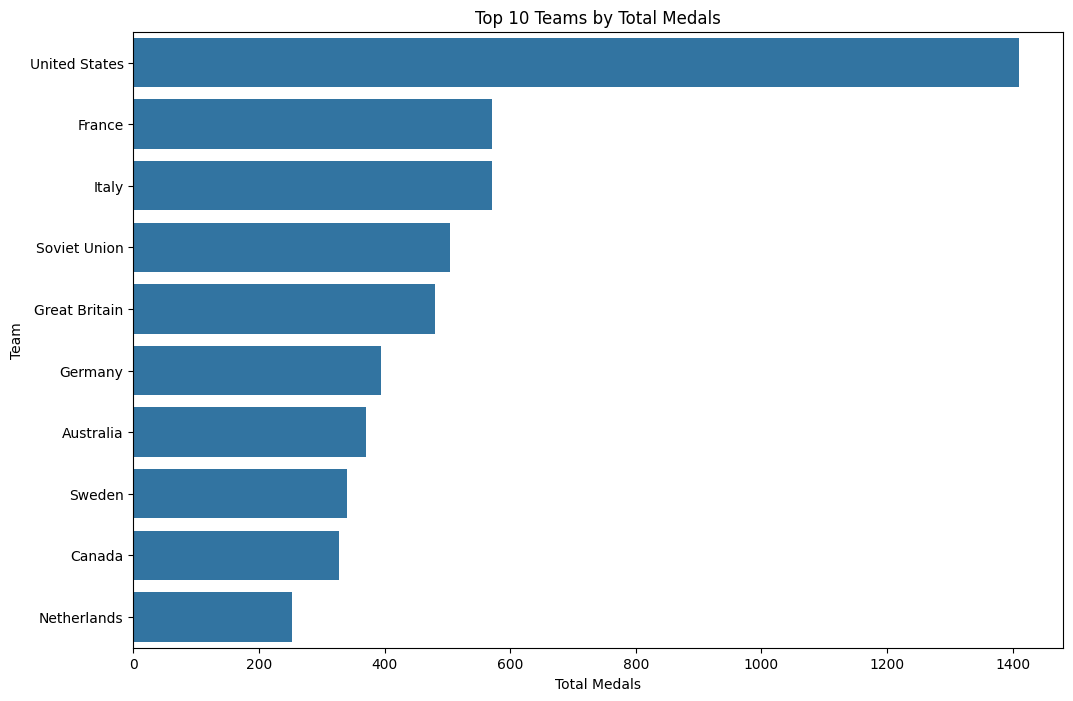

In [ ]:
#Visualisasi Distribusi Medali
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi hasil Spark DataFrame ke Pandas DataFrame untuk visualisasi
medal_count_by_team_pd = medal_count_by_team.toPandas()

# Plot distribusi medali
plt.figure(figsize=(12, 8))
sns.barplot(data=medal_count_by_team_pd.head(10), x='Total_Medals', y='Team')
plt.xlabel('Total Medals')
plt.ylabel('Team')
plt.title('Top 10 Teams by Total Medals')
plt.show()

**ANALISIS PREDIKTIF**

In [ ]:
# Mengubah tipe data kolom ke numerik jika diperlukan
df = df.withColumn("Age", col("Age").cast("double")) \
       .withColumn("Height", col("Height").cast("double")) \
       .withColumn("Weight", col("Weight").cast("double"))

# Encoding kolom 'Medal' menjadi numerik
indexer = StringIndexer(inputCol="Medal", outputCol="Medal_index")
encoded_df = indexer.fit(df).transform(df)

# Gabungkan kolom numerik ke dalam satu vektor fitur, handle null values
assembler = VectorAssembler(inputCols=['Age', 'Height', 'Weight'], outputCol='features', handleInvalid="skip") # Change handleInvalid to 'skip'
assembled_df = assembler.transform(encoded_df)

# Menyaring hanya kolom yang diperlukan
final_df = assembled_df.select('features', 'Medal_index')

# Membagi data menjadi data pelatihan dan data pengujian
train_data, test_data = final_df.randomSplit([0.7, 0.3], seed=42)

# Membuat dan melatih model logistic regression
lr = LogisticRegression(labelCol='Medal_index', featuresCol='features', maxIter=10)
lr_model = lr.fit(train_data)

# Melakukan prediksi pada data pengujian
predictions = lr_model.transform(test_data)
predictions.select('features', 'Medal_index', 'prediction').show(10)

+-----------------+-----------+----------+
|         features|Medal_index|prediction|
+-----------------+-----------+----------+
|[14.0,162.0,45.0]|        0.0|       0.0|
|[14.0,162.0,45.0]|        2.0|       0.0|
|[14.0,173.0,59.0]|        0.0|       0.0|
|[14.0,173.0,59.0]|        2.0|       0.0|
|[15.0,157.0,44.0]|        0.0|       0.0|
|[15.0,157.0,44.0]|        0.0|       0.0|
|[15.0,157.0,44.0]|        1.0|       0.0|
|[15.0,160.0,47.0]|        0.0|       0.0|
|[15.0,160.0,52.0]|        2.0|       0.0|
|[15.0,162.0,38.0]|        0.0|       0.0|
+-----------------+-----------+----------+
only showing top 10 rows



**EVALUASI MODEL**

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluasi model menggunakan akurasi
evaluator = MulticlassClassificationEvaluator(labelCol='Medal_index', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Akurasi model: {accuracy}")

Akurasi model: 0.33057045343734764


In [ ]:
# Menghitung presisi
precision_evaluator = MulticlassClassificationEvaluator(labelCol='Medal_index', predictionCol='prediction', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(predictions)
print(f"Presisi model: {precision}")

Presisi model: 0.3309703160192922


In [ ]:
# Menghitung recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='Medal_index', predictionCol='prediction', metricName='weightedRecall')
recall = recall_evaluator.evaluate(predictions)
print(f"Recall model: {recall}")

Recall model: 0.33057045343734764


In [ ]:
# Menghitung F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol='Medal_index', predictionCol='prediction', metricName='f1')
f1 = f1_evaluator.evaluate(predictions)
print(f"F1-Score model: {f1}")

F1-Score model: 0.27093895746002933


**MENJAWAB PERTANYAAN BISNIS**

1. Negara mana yang paling banyak memperoleh medali dalam sejarah Olimpiade?

In [ ]:
# Negara dengan perolehan medali terbanyak
medal_count_by_country = df.groupBy("Team").agg(count("Medal").alias("Total_Medals")).orderBy(col("Total_Medals").desc())
medal_count_by_country.show(10)

+-------------+------------+
|         Team|Total_Medals|
+-------------+------------+
|United States|        1410|
|       France|         571|
|        Italy|         571|
| Soviet Union|         504|
|Great Britain|         481|
|      Germany|         395|
|    Australia|         370|
|       Sweden|         341|
|       Canada|         327|
|  Netherlands|         253|
+-------------+------------+
only showing top 10 rows



2. Bagaimana tren perolehan medali dari waktu ke waktu?

+----+------------+
|Year|Total_Medals|
+----+------------+
|NULL|         186|
|1896|          25|
|1900|         188|
|1904|         124|
|1906|         112|
|1908|         222|
|1912|         238|
|1920|         370|
|1924|         264|
|1928|         216|
|1932|         186|
|1936|         247|
|1948|         272|
|1952|         270|
|1956|         249|
|1960|         261|
|1964|         278|
|1968|         255|
|1972|         310|
|1976|         357|
+----+------------+
only showing top 20 rows



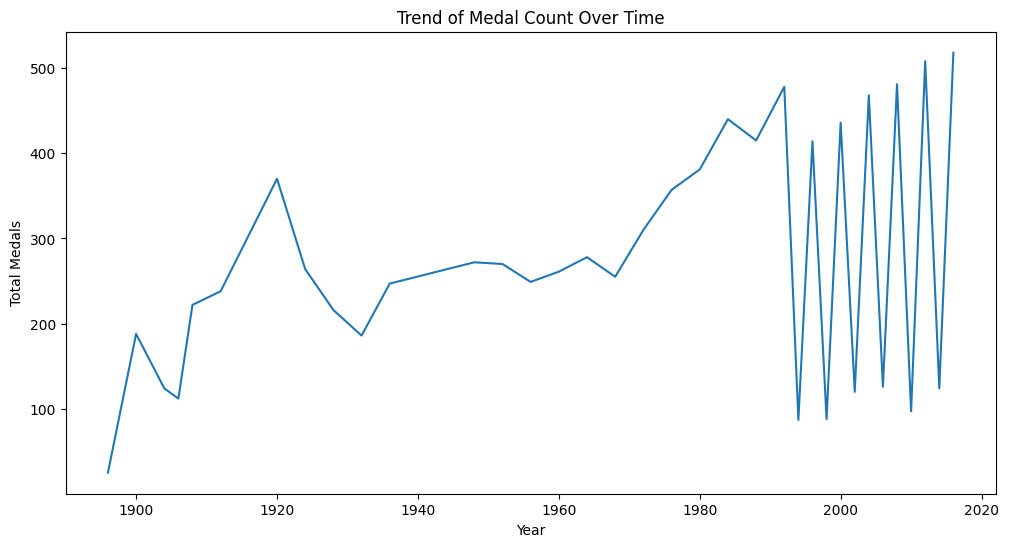

In [ ]:
from pyspark.sql.functions import split, col

# Ekstrak tahun dari kolom 'Games'
df = df.withColumn('Year', split(df['Games'], ' ')[0].cast('int'))

# Tren perolehan medali dari waktu ke waktu
medal_trend = df.groupBy("Year").agg(count("Medal").alias("Total_Medals")).orderBy("Year")
medal_trend.show()

# Visualisasi tren perolehan medali dari waktu ke waktu
pd_medal_trend = medal_trend.toPandas()
plt.figure(figsize=(12, 6))
sns.lineplot(data=pd_medal_trend, x="Year", y="Total_Medals")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.title("Trend of Medal Count Over Time")
plt.show()

3. Apa saja faktor yang mempengaruhi jumlah medali yang diperoleh oleh suatu negara?

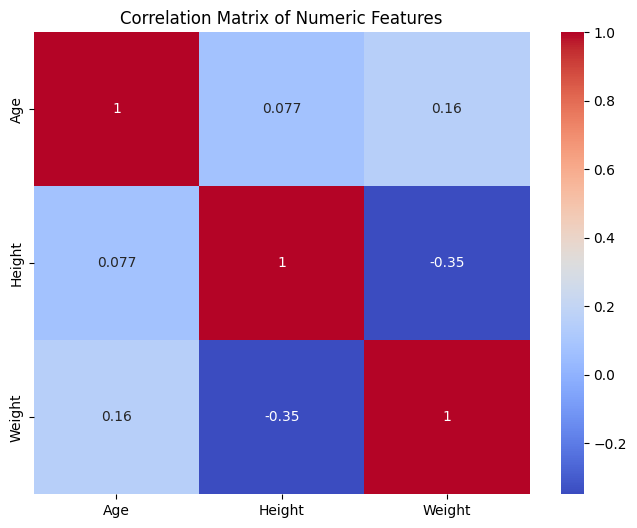

In [ ]:
# Menghitung korelasi antara fitur numerik dan jumlah medali
numeric_features = ['Age', 'Height', 'Weight']
correlation_matrix = df.select(numeric_features).toPandas().corr()

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

4. Bagaimana performa atlet dari berbagai negara dalam berbagai cabang olahraga?

+----------+-------------+------------+
|     Sport|         Team|Total_Medals|
+----------+-------------+------------+
| Athletics|United States|         312|
|  Swimming|United States|         252|
|   Fencing|        Italy|         124|
|   Fencing|       France|         108|
|Basketball|United States|         103|
|  Swimming|    Australia|          98|
| Athletics|Great Britain|          95|
|    Hockey|  Netherlands|          87|
|    Rowing|United States|          86|
|Gymnastics| Soviet Union|          84|
+----------+-------------+------------+
only showing top 10 rows



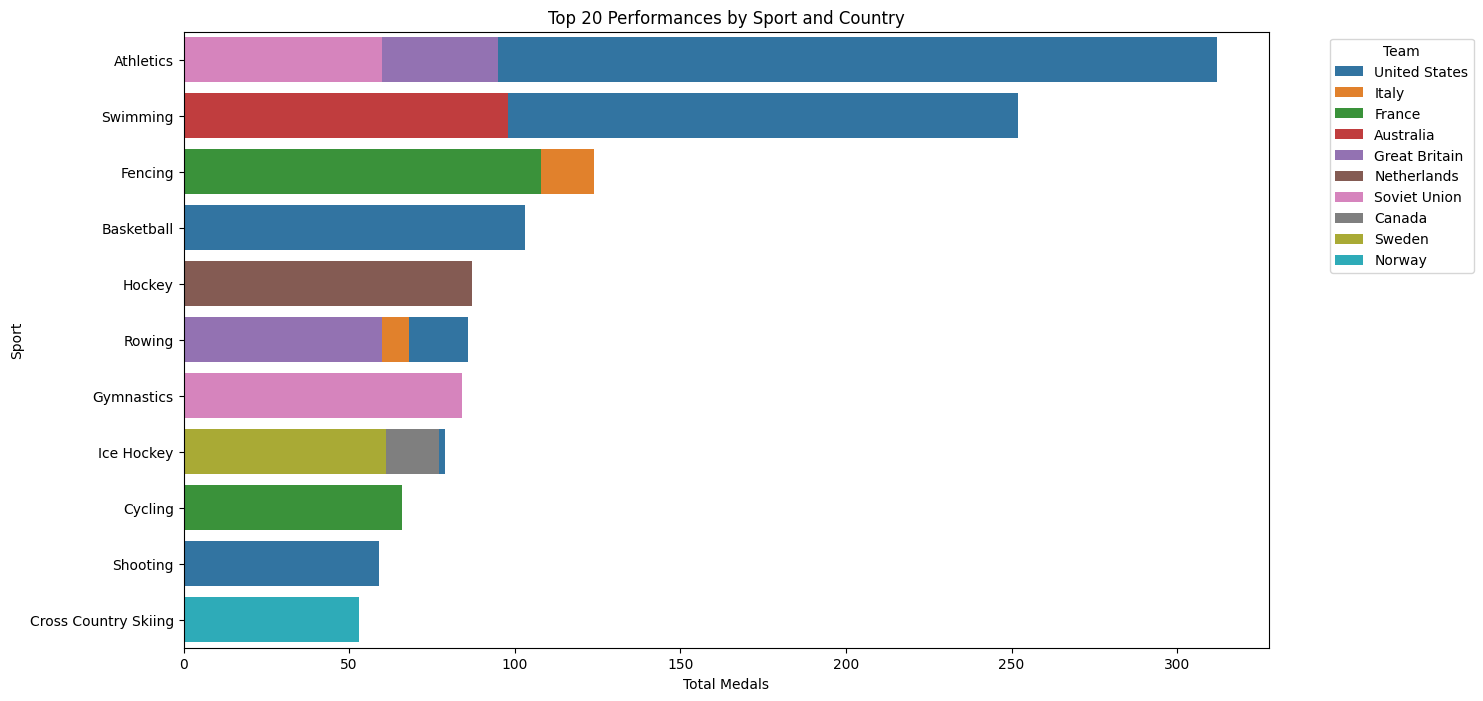

In [ ]:
# Performa atlet dari berbagai negara dalam berbagai cabang olahraga
performance_by_sport_country = df.groupBy("Sport", "Team").agg(count("Medal").alias("Total_Medals")).orderBy(col("Total_Medals").desc())
performance_by_sport_country.show(10)

# Visualisasi performa dalam berbagai cabang olahraga
pd_performance_by_sport_country = performance_by_sport_country.toPandas().head(20)
plt.figure(figsize=(14, 8))
sns.barplot(data=pd_performance_by_sport_country, x="Total_Medals", y="Sport", hue="Team", dodge=False)
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.title("Top 20 Performances by Sport and Country")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()